# **HEART DISEASE PREDICTION**

 The objective is to develop a machine learning model that can predict the presence or absence of heart disease in a patient based on various clinical and personal features.

## **1.DATA READING**

#### **IMPORT REQUIRED LIBRARIES**

This section imports all necessary Python libraries for the project

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#### **LOAD DATASET**

We load the heart disease dataset into a DataFrame to begin analysis and modeling.

In [184]:
df = pd.read_csv("values.csv")
cf=pd.read_csv("labels.csv")

In [185]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [186]:
cf

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [187]:
target_col = [col for col in cf.columns if col != 'patient_id'][0]
print("Target column detected ", target_col)

Target column detected  heart_disease_present


#### **MERGE DATASET**

Combine Multiple Datasets Into One Using Pandas. This is useful if the patient data is stored.

In [188]:
df = df.merge(cf, on='patient_id', how='inner')
print("Merged shape:", df.shape)

Merged shape: (180, 15)


In [189]:
X = df.drop(columns=['patient_id', target_col])
y = df[target_col]

In [190]:
X = pd.get_dummies(X, drop_first=True)

print("Data after encoding:")
print(X.head())

Data after encoding:
   slope_of_peak_exercise_st_segment  resting_blood_pressure  chest_pain_type  \
0                                  1                     128                2   
1                                  2                     110                3   
2                                  1                     125                4   
3                                  1                     152                4   
4                                  3                     178                1   

   num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  \
0                  0                                     0   
1                  0                                     0   
2                  3                                     0   
3                  0                                     0   
4                  0                                     0   

   resting_ekg_results  serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  \
0                    2                

#### **BASIC CHECKS**

After loading the dataset, we perform basic checks to understand its structure and quality.

In [191]:
X.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_normal,thal_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,True,False
1,2,110,3,0,0,0,214,1.6,0,54,158,0,True,False
2,1,125,4,3,0,2,304,0.0,1,77,162,1,True,False
3,1,152,4,0,0,0,223,0.0,1,40,181,0,False,True
4,3,178,1,0,0,2,270,4.2,1,59,145,0,False,True


In [192]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: heart_disease_present, dtype: int64

In [193]:
display(df.head())
df.info()          

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [194]:
dup_ids = df.duplicated("patient_id").sum()
print(f"Duplicated IDs: {dup_ids}")

Duplicated IDs: 0


## **2.Exploratory Data Analysis (EDA)**

EDA helps in understanding the structure of data, including the types of variables, data distribution, and potential data quality issues (missing values, outliers) using visualization.

. Visualized age, cholesterol, and blood pressure distributions.

. Checked balance in heart disease presence using count plots.

. Compared features across patients with/without heart disease.

. Found useful insights to guide feature selection and model building.

In [195]:
print(X.columns.tolist())

['slope_of_peak_exercise_st_segment', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina', 'thal_normal', 'thal_reversible_defect']


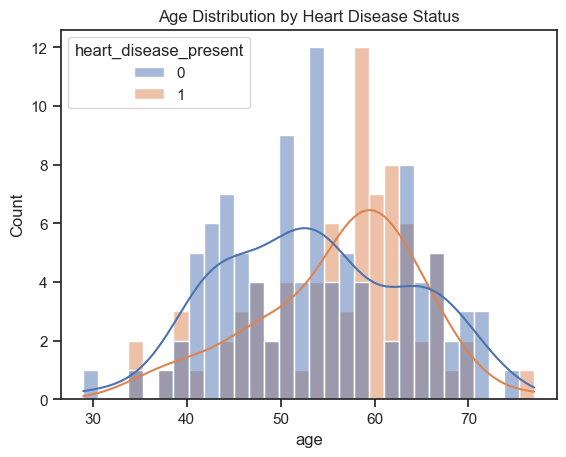

In [196]:
sns.histplot(data=df, x="age", hue="heart_disease_present", kde=True, bins=30)
plt.title("Age Distribution by Heart Disease Status")
plt.show()


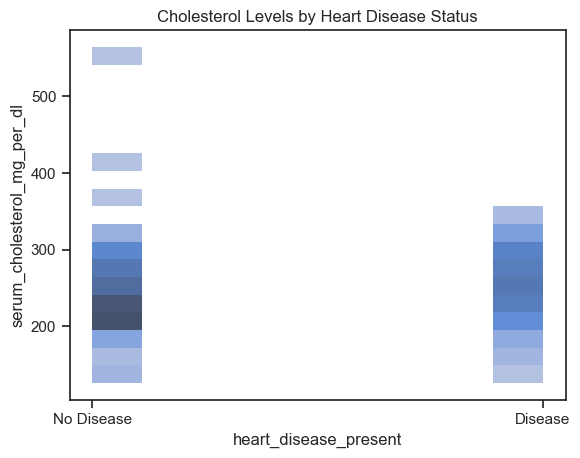

In [197]:
sns.histplot(data=df, x="heart_disease_present", y="serum_cholesterol_mg_per_dl")
plt.title("Cholesterol Levels by Heart Disease Status")
plt.xticks([0, 1], ["No Disease", "Disease"])
plt.show()

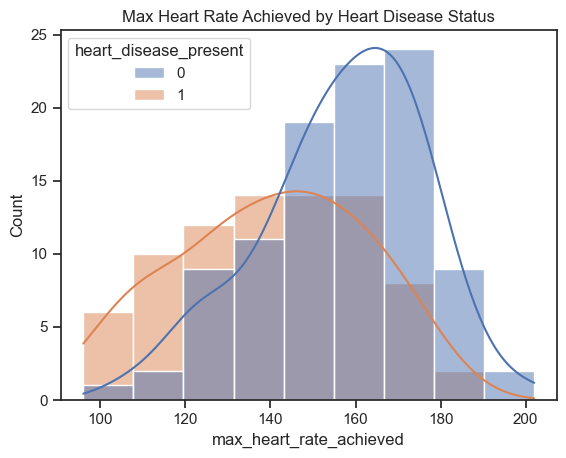

In [198]:
sns.histplot(data=df, x="max_heart_rate_achieved", hue="heart_disease_present", kde=True)
plt.title("Max Heart Rate Achieved by Heart Disease Status")
plt.show()

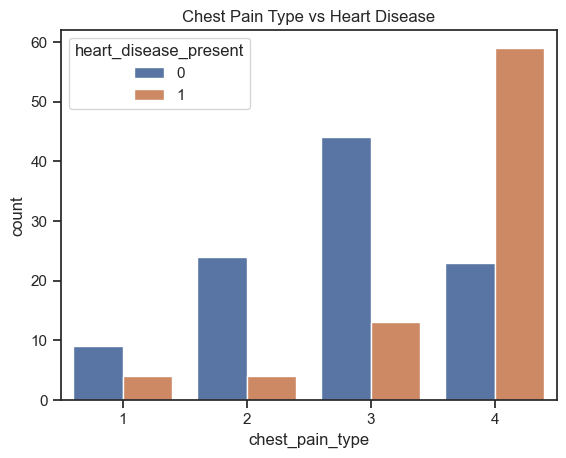

In [199]:
sns.countplot(data=df, x="chest_pain_type", hue="heart_disease_present")
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

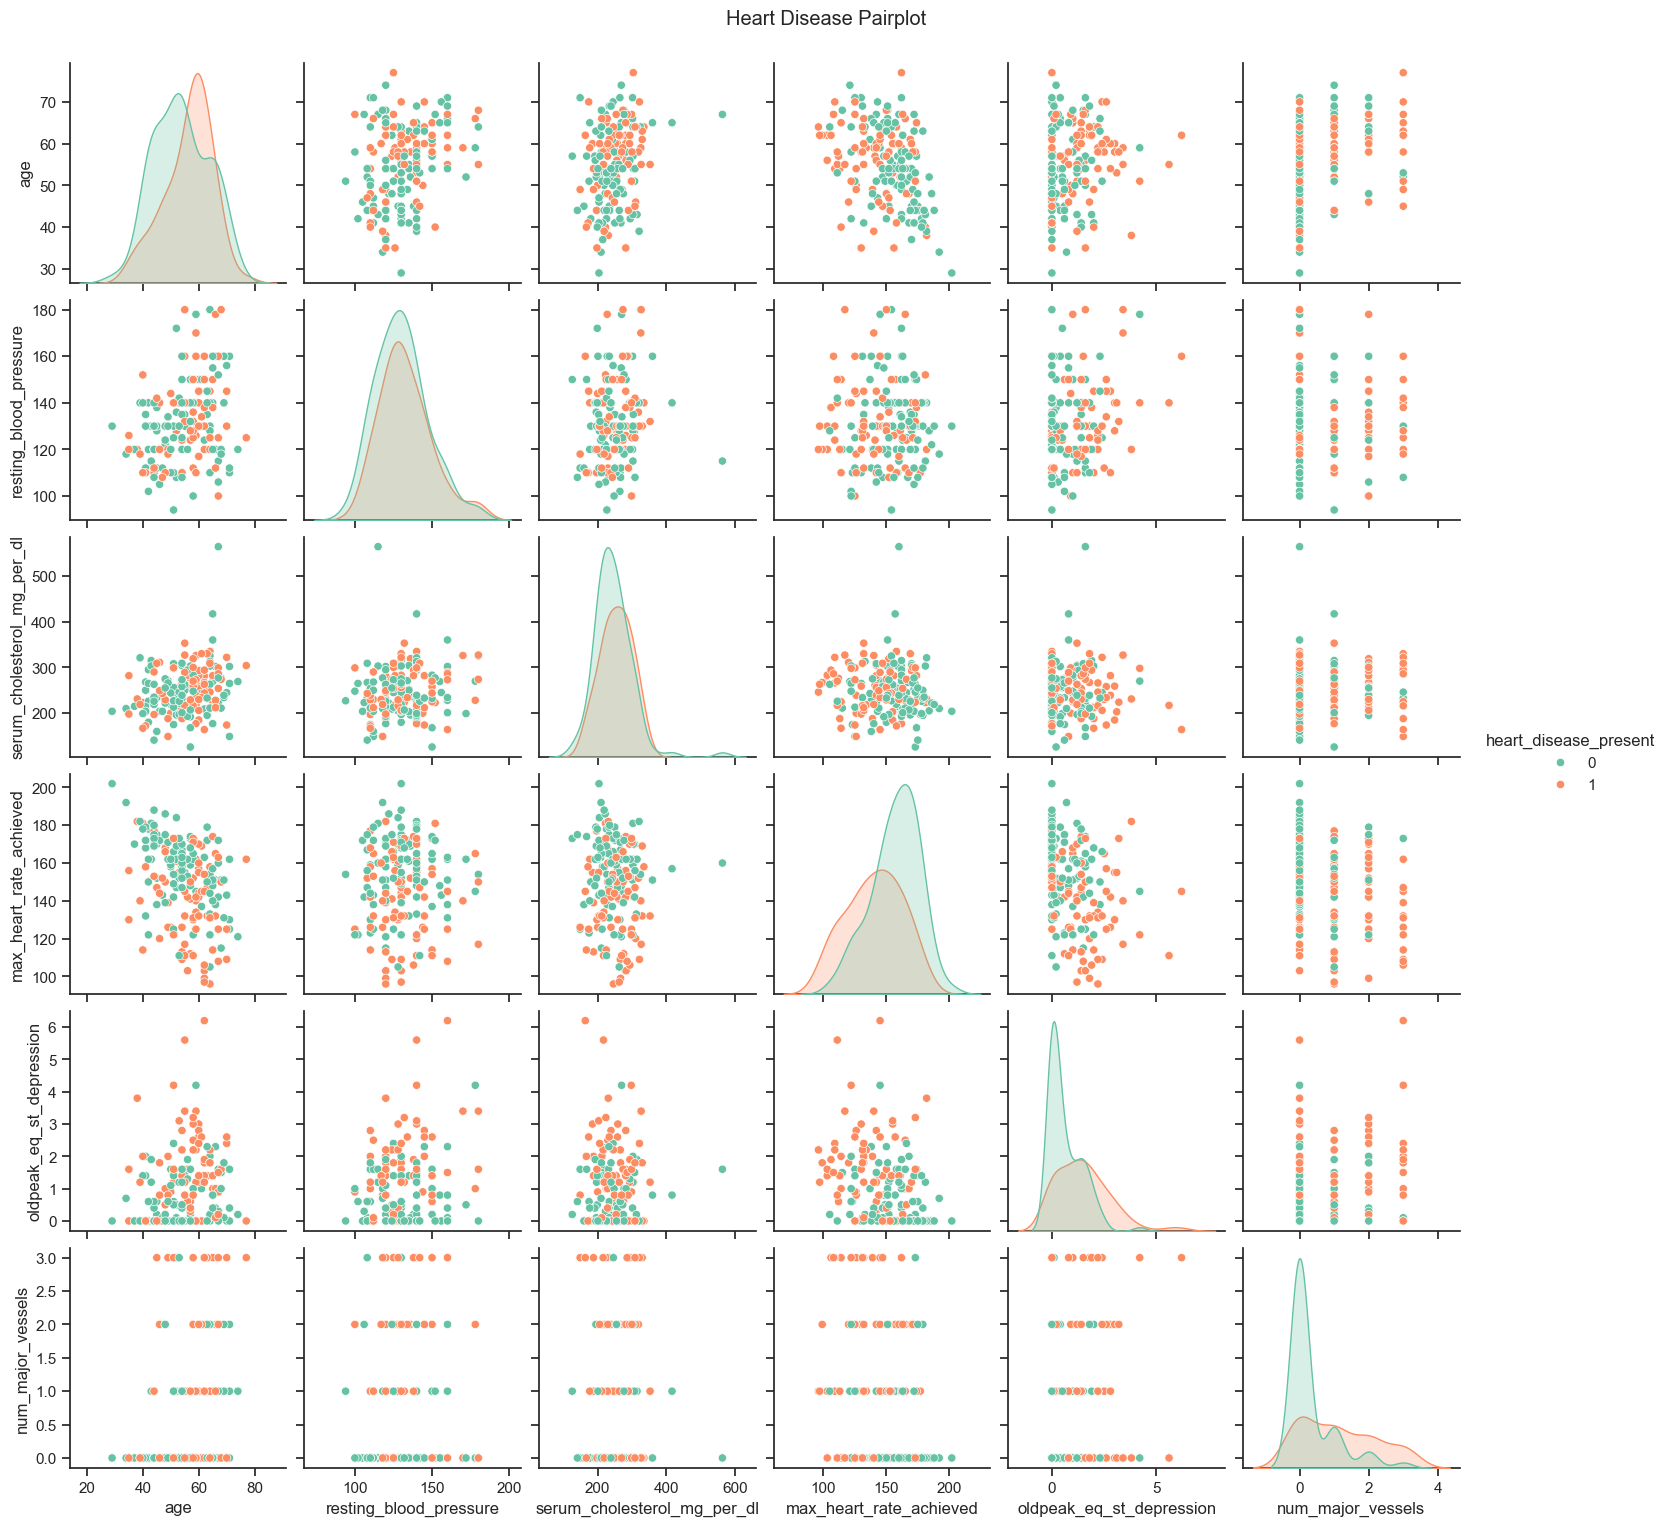

In [205]:
selected_features = [
    'age',
    'resting_blood_pressure',
    'serum_cholesterol_mg_per_dl',
    'max_heart_rate_achieved',
    'oldpeak_eq_st_depression',
    'num_major_vessels',
    'heart_disease_present' 
]

sns.pairplot(df[selected_features], hue='heart_disease_present', palette='Set2', diag_kind='kde')
plt.suptitle("Heart Disease Pairplot", y=1.02)
plt.show()

In [ ]:
cat_cols = X.select_dtypes(include="object").columns

#### **CORRELATION ANALYSIS**

We analyzed how features relate to heart disease.

. Chest pain, max heart rate, and oldpeak showed strong correlation.

. High chest pain and low max heart rate are linked to heart disease.

. Some features like cholesterol showed weak correlation.

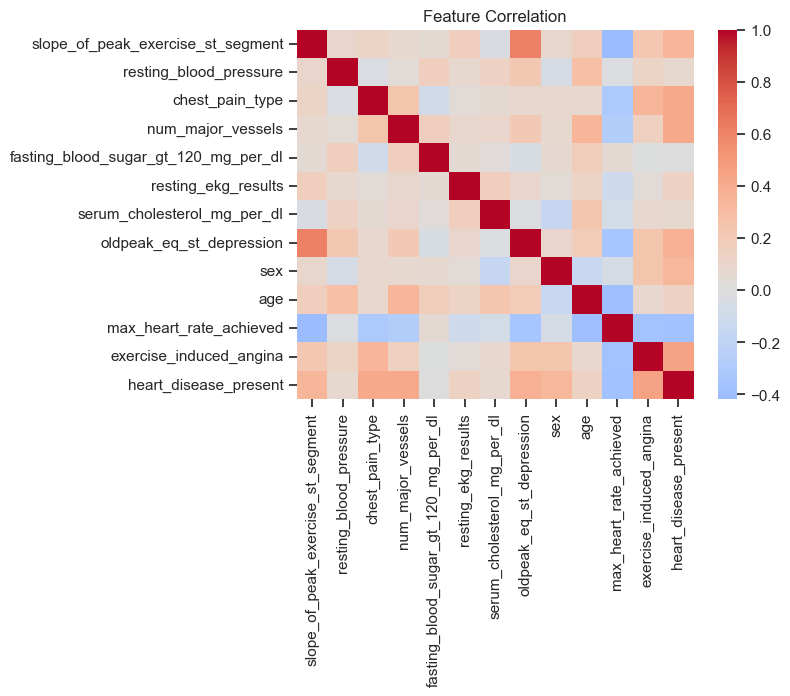

In [ ]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr = df[num_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Feature Correlation")
plt.show()

In [ ]:
for col in cat_cols:
    ct = pd.crosstab(x[col], x["heart_disease_present"], normalize="index")
    ct.plot(kind="bar", stacked=True)
    plt.title(f"{col} vs. target")
    plt.ylabel("Proportion")
    plt.legend(title="Heart disease", labels=["No", "Yes"])
    plt.show()

In [ ]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

## **3.Train and Test and split**

We split the heart disease dataset to build and evaluate our model:

. The training set is used to help the model learn patterns from patient features.

. he test set helps us check if the model can accurately predict heart disease on new, unseen patients.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [ ]:
X_train

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_normal,thal_reversible_defect
139,1,130,2,0,0,2,219,0.0,1,44,188,0,True,False
0,1,128,2,0,0,2,308,0.0,1,45,170,0,True,False
169,2,110,1,0,0,2,211,1.8,1,64,144,1,True,False
65,1,126,4,0,0,2,282,0.0,1,35,156,1,False,True
98,1,155,3,0,0,0,269,0.8,0,65,148,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1,160,3,1,0,0,201,0.0,0,54,163,0,True,False
69,2,120,3,3,0,0,188,2.0,1,49,139,0,False,True
48,2,120,2,1,0,2,281,1.4,1,62,103,0,False,True
153,1,112,4,1,0,2,290,0.0,1,44,153,0,True,False


In [ ]:
y_train

139    0
0      0
169    0
65     1
98     0
      ..
179    0
69     1
48     1
153    1
60     0
Name: heart_disease_present, Length: 144, dtype: int64

 ## **4.MODEL CREATION AND PREDICTION**

Our first goal is to build model with different algorithms and choose the one that gives the highest accuracy. In our project we have chosed five algorithms:

1.Logistic Regression

2.Decision tree

3.Random Forest 

4.Gradient Boosting 

5.XGBoost

Models were evaluated using metrics like accuracy and AUC, and the best one was used to predict if a patient has heart disease (1) or not (0).

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=300, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

In [ ]:
results_table = []
accuracy_dict = {}
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    trained_models[name] = model
    accuracy_dict[name] = acc
    
    results_table.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(report["macro avg"]["precision"], 4),
        "Recall": round(report["macro avg"]["recall"], 4),
        "F1-score ": round(report["macro avg"]["f1-score"], 4)
    })
results_df = pd.DataFrame(results_table)
print("\n Model Performance Summary:")
print(results_df.to_string(index=False))


c:\Users\SM RAJA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Model Performance Summary:
              Model  Accuracy  Precision  Recall  F1-score 
Logistic Regression    0.8333     0.8333  0.8375     0.8328
      Decision Tree    0.8056     0.8034  0.8063     0.8042
      Random Forest    0.8333     0.8333  0.8375     0.8328
  Gradient Boosting    0.9167     0.9211  0.9250     0.9166
            XGBoost    0.8333     0.8438  0.8438     0.8333


## **5.BEST MODEL**

After training and testing all models, we chose the one with the highest accuracy and F1 score.
This model gave the most reliable predictions and was used in the final heart disease prediction system.

In [ ]:

best_name = max(accuracy_dict, key=accuracy_dict.get)
best_model = trained_models[best_name]

print(f"\n Best model is **{best_name}** with accuracy {round(accuracy_dict[best_name], 4)}")



 Best model is **Gradient Boosting** with accuracy 0.9167


we can see that Gradient Boosting gives the highest accuracy of 91%.
Hence the best among them is **Gradient Boosting**.

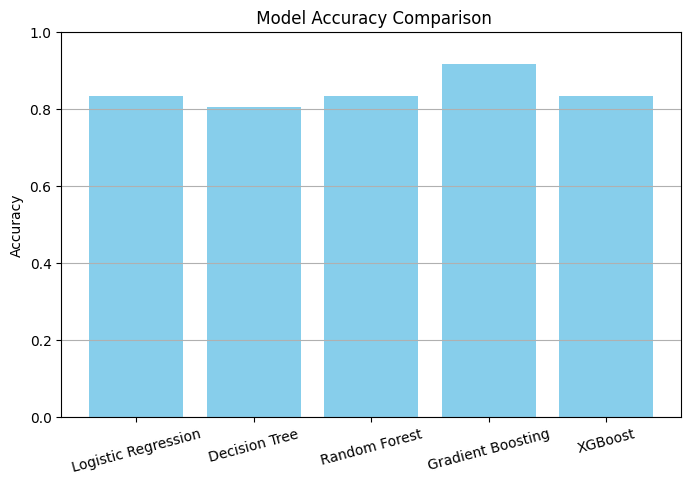

In [ ]:
accuracy_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc

plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.title(" Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()


## **6.INPUTING NEW DATA**

We developed an interactive Streamlit web app where users can input patient details such as age, chest pain type, blood pressure, and other health metrics.

The app uses a trained machine learning model to instantly predict whether the patient is likely to have heart disease (1) or not (0).

In [ ]:
new_patient = {
    'age': 45,
    'sex': 0,                                    # female
    'chest_pain_type': 1,                        # mild pain
    'resting_blood_pressure': 120,               # normal BP
    'serum_cholesterol_mg_per_dl': 180,          # healthy cholesterol
    'fasting_blood_sugar_gt_120_mg_per_dl': 0,   # normal sugar
    'resting_ekg_results': 0,                    # normal ECG
    'max_heart_rate_achieved': 165,              # strong heart response
    'exercise_induced_angina': 0,                # no angina during exercise
    'oldpeak_eq_st_depression': 0.0,             # no ST depression
    'slope_of_peak_exercise_st_segment': 2,      # up-sloping
    'num_major_vessels': 0,                      # clean vessels
    'thal': 'normal'                             # normal thallium scan
}

In [ ]:
new_df = pd.DataFrame([new_patient])
new_df_enc = pd.get_dummies(new_df, drop_first=True).reindex(columns=X.columns, fill_value=0)

In [ ]:
label  = best_model.predict(new_df_enc)[0]
proba  = best_model.predict_proba(new_df_enc)[0][1] if hasattr(best_model, "predict_proba") else None


In [ ]:
print("\n Prediction for new patient:", label, "(1 = heart disease, 0 = no disease)")
if proba is not None:
    print("Confidence:", f"{proba*100:.2f}%")


 Prediction for new patient: 0 (1 = heart disease, 0 = no disease)
Confidence: 0.69%


### CHALLENGES FACED

 In our project, we encountered these difficulties in 

1.in load dataset part There are two datasets  one for labels and one for values i had a doubt about Should I combine both datasets and use supervised learning, or should I use unsupervised learning with only the values dataset.

2.Choosing the right model was challenging. Multiple algorithms were tested (e.g., Logistic Regression, Random Forest, XGBoost), and we had to compare them based on performance metrics like accuracy and AUC to select the best one.